In [1]:
import h5py
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

In [2]:
fpath_eddy = '/gscratch/jisao/mclaret/GL64/Juillet/'
f = h5py.File(fpath_eddy + 'eddy_tracks.mat')

# Arrange data into a list of dictionaries
data = f['tracks']            # relevant variables
varnames = list(f['tracks'])  # variable names
ntracks = len(data['x1'])     # number of tracks (should match with length of data in 'x1')

tracks = []                   # initialize list of eddy tracks

# add dictionaries for each variable to the corresponding eddy index (0 - N-1)
for itrack in range(ntracks):
    variables = {var:[] for var in varnames}  # initialize a dictionary with each variable name
    for var in varnames:
        # go through each variable
        if var[0:6] == 'shapes':
            # translate shapes data to list of numpy arrays (one array for each time step)
            coordinates = []                             # initialize list of coordinates
            numSteps = len(f[data[var][itrack,0]][(0)])  # number of timesteps
            # each timestep has its own hdf5 object reference, so append each step to a list
            for step in range(numSteps):
                coords = np.array(f[f[data[var][itrack,0]][(0, step)]])
                coordinates.append(coords)
            variables[var] = coordinates
        else:
            # translate data from hdf5 object reference to numpy array
            variables[var] = np.array(f[data[var][itrack,0]][(0)])
    tracks.append(variables)
    
print('Number of eddies:', len(tracks))

Number of eddies: 111


In [3]:
lifetime = 120         # lifetime to keep (in hours)
ntracks = len(tracks)  # number of eddies
cyclones = []          # list to hold cyclonic eddies
anticyclones = []      # list to hold anticyclonic eddies
nIssue = 0
wIssue = []

for i, track in enumerate(tracks):
    timesteps = track['step'][-1] - track['step'][0]+1
    if timesteps >= lifetime and track['type'][0] == 1.: #and len(track['step'])>=lifetime:
        # add to list of cyclonic eddies
        cyclones.append(track)
        print(i, 'lifetime:', timesteps, '  ', 'num steps:', len(track['step']))
    if timesteps >= lifetime and track['type'][0] == -1.: #and len(track['step'])>=lifetime:
        # add to list of cyclonic eddies
        anticyclones.append(track)
        print(i, 'lifetime:', timesteps, '  ', 'num steps:', len(track['step']))
    if (len(track['step'])-timesteps) != 1:
        nIssue += 1
        wIssue.append(i)
print('num eddies:', ntracks)
print('w/ step issue:', nIssue)
print(wIssue)
print('num cyclones:', len(cyclones))
print('num anticyclones:', len(anticyclones))

0 lifetime: 225.0    num steps: 163
2 lifetime: 371.0    num steps: 358
5 lifetime: 371.0    num steps: 371
6 lifetime: 371.0    num steps: 371
7 lifetime: 146.0    num steps: 92
10 lifetime: 371.0    num steps: 349
12 lifetime: 197.0    num steps: 176
13 lifetime: 276.0    num steps: 276
14 lifetime: 371.0    num steps: 354
17 lifetime: 294.0    num steps: 288
19 lifetime: 371.0    num steps: 370
22 lifetime: 162.0    num steps: 158
26 lifetime: 371.0    num steps: 354
28 lifetime: 358.0    num steps: 338
29 lifetime: 371.0    num steps: 371
30 lifetime: 232.0    num steps: 219
31 lifetime: 284.0    num steps: 280
33 lifetime: 174.0    num steps: 73
34 lifetime: 294.0    num steps: 127
36 lifetime: 173.0    num steps: 56
37 lifetime: 368.0    num steps: 364
38 lifetime: 368.0    num steps: 350
39 lifetime: 368.0    num steps: 365
40 lifetime: 308.0    num steps: 201
42 lifetime: 218.0    num steps: 168
45 lifetime: 310.0    num steps: 292
48 lifetime: 126.0    num steps: 100
52 lifeti

In [4]:
# check steps and lifetime
print('cyclones:')
for i, eddy in enumerate(cyclones):
    lftm = eddy['step'][-1] - eddy['step'][0]+1
    print(i, 'lifetime:', lftm, '  ', 'num steps:', len(eddy['step']))
print()
print('anticyclones:')
for i, eddy in enumerate(anticyclones):
    lftm = eddy['step'][-1] - eddy['step'][0]+1
    print(i, 'lifetime:', lftm, '  ', 'num steps:', len(eddy['step']))

cyclones:
0 lifetime: 371.0    num steps: 358
1 lifetime: 371.0    num steps: 371
2 lifetime: 371.0    num steps: 349
3 lifetime: 276.0    num steps: 276
4 lifetime: 371.0    num steps: 354
5 lifetime: 294.0    num steps: 288
6 lifetime: 162.0    num steps: 158
7 lifetime: 358.0    num steps: 338
8 lifetime: 371.0    num steps: 371
9 lifetime: 284.0    num steps: 280
10 lifetime: 173.0    num steps: 56
11 lifetime: 368.0    num steps: 364
12 lifetime: 368.0    num steps: 350
13 lifetime: 368.0    num steps: 365
14 lifetime: 308.0    num steps: 201
15 lifetime: 310.0    num steps: 292
16 lifetime: 313.0    num steps: 254
17 lifetime: 317.0    num steps: 306
18 lifetime: 247.0    num steps: 240
19 lifetime: 140.0    num steps: 136
20 lifetime: 198.0    num steps: 172
21 lifetime: 173.0    num steps: 130
22 lifetime: 132.0    num steps: 65

anticyclones:
0 lifetime: 225.0    num steps: 163
1 lifetime: 371.0    num steps: 371
2 lifetime: 146.0    num steps: 92
3 lifetime: 197.0    num step

In [5]:
from scipy.io import netcdf

fpath_vel = '/gscratch/jisao/mclaret/GL64/Juillet/'
gridU_k1 = netcdf.netcdf_file(fpath_vel + 'GLazur64-T20_y2009m07_gridU_k1.nc','r')
gridV_k1 = netcdf.netcdf_file(fpath_vel + 'GLazur64-T20_y2009m07_gridV_k1.nc','r')
gridU_k58 = netcdf.netcdf_file(fpath_vel + 'GLazur64-T20_y2009m07_gridU_k58.nc','r')
gridV_k58 = netcdf.netcdf_file(fpath_vel + 'GLazur64-T20_y2009m07_gridV_k58.nc','r')

In [6]:
# keep lowest values along each nav dimension, and verify nav resolution
lowest_lon = gridU_k1.variables['nav_lon'][0, 0].copy()  # lowest longitude
lowest_lat = gridU_k1.variables['nav_lat'][0, 0].copy()  # lowest latitude
nav_res = 1./64  # temporal resolution of coords
dt = 1.0         # spatial resolution (in hours)
omega = 7.2921e-5

In [7]:
def fillCoords(trackSteps, trackLons, trackLats, fill='midpoint'):
    # fill xs and ys (one point btwn gaps)
    prev = trackSteps[0]
    steps = np.array([])
    lons = []
    lats = []
    for i, step in enumerate(trackSteps):
        lon = trackLons[i]
        lat = trackLats[i]
        if step - prev > 1:
            # there is a gap
            stepFill = np.arange(prev+1, step, 1.)
            numFill = len(stepFill)
            if fill == 'midpoint':
                # fill using mid-point between points
                lonFill = np.ones(len(stepFill))*((lon + trackLons[i-1])/2)
                latFill = np.ones(len(stepFill))*((lat + trackLats[i-1])/2)
            elif fill == 'linear':
                lonFill = np.linspace(trackLons[i-1], trackLons[i], num=numFill)
                latFill = np.linspace(trackLats[i-1], trackLats[i], num=numFill)
            steps = np.append(steps, stepFill)
            lons = np.append(lons, lonFill)
            lats = np.append(lats, latFill)
        steps = np.append(steps, step)
        lons = np.append(lons, lon)
        lats = np.append(lats, lat)
        prev = step
    steps.flatten()
    lons.flatten()
    lats.flatten()
    return steps, lons, lats

In [8]:
# check interpolation
eddy = anticyclones[2]
maxt = len(eddy['step'])    # num of steps where this eddy is present
dt = 1.0                    # resolution (in hours)
gTimes = eddy['step']       # each timestep for this eddy
t0 = int(eddy['step'][0])   # first timestep
t1 = int(eddy['step'][-1])  # last timestep

U_gap = []
U_fil = []
U_t1 = []
V_gap = []
V_fil = []
Uy = []
Vy = []
V_t1 = []
gaps = []
prev = eddy['step'][0]
prevU = 0
prevV = 0
fTimes, lons, lats = fillCoords(eddy['step'], eddy['x1'], eddy['y1'])
for i, time in enumerate(fTimes):
    target_lon = lons[i]  # longitude of eddy center
    target_lat = lats[i]  # latitude of eddy center
    i_T = int(time-1)                                # index of time
    lb_lon = int((target_lon - lowest_lon)/nav_res)  # index of lon lower bound
    lb_lat = int((target_lat - lowest_lat)/nav_res)  # index of lat lower bound

    W2lon = (target_lon - lowest_lon)%nav_res  # W2 lon
    W2lat = (target_lat - lowest_lat)%nav_res  # W2 lat

    Us = gridU_k1.variables['vozocrtx'][i_T, 0, lb_lat:lb_lat+2, lb_lon:lb_lon+2].copy()  # zonal velocities grid
    Vs = gridV_k1.variables['vomecrty'][i_T, 0, lb_lat:lb_lat+2, lb_lon:lb_lon+2].copy()  # meridional velocities grid

    # interpolate for U and V (based on unit square)
    U_target = Us[0,0]*(1-W2lon)*(1-W2lat) + Us[0,1]*W2lon*(1-W2lat) + Us[1,0]*(1-W2lon)*W2lat + Us[1,1]*W2lon*W2lat
    V_target = Vs[0,0]*(1-W2lon)*(1-W2lat) + Vs[0,1]*W2lon*(1-W2lat) + Vs[1,0]*(1-W2lon)*W2lat + Vs[1,1]*W2lon*W2lat
    U_fil.append(U_target)
    V_fil.append(V_target)
    
    if time in eddy['step']:
        # add to gap lists
        U_gap.append(U_target)
        V_gap.append(V_target)
        if time - prev > 1:
            # keep track of values for gap points
            gaps = np.append(gaps, [prev,time])
            Uy = np.append(Uy, [prevU,U_target])
            Vy = np.append(Vy, [prevV,V_target])
        prev = time
        prevU = U_target
        prevV = V_target
    if time == eddy['step'][-1]:
        # keep U and V data at the lb of last position
        U_t1 = gridU_k1.variables['vozocrtx'][t0:t1+1, 0, lb_lat, lb_lon].copy()
        V_t1 = gridV_k1.variables['vomecrty'][t0:t1+1, 0, lb_lat, lb_lon].copy()
gaps.flatten()
Uy.flatten()
Vy.flatten()
print('steps:', gTimes)
print('gaps:', gaps)

steps: [  1.   2.   3.   4.   5.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76.  77.  78.  79.  80.  81.  83.  85.  88.  89.  90.  91.  92.  93.
  94.  95.  96. 107. 109. 110. 128. 146.]
gaps: [  5.  10.  25.  27.  81.  83.  83.  85.  85.  88.  96. 107. 107. 109.
 110. 128. 128. 146.]


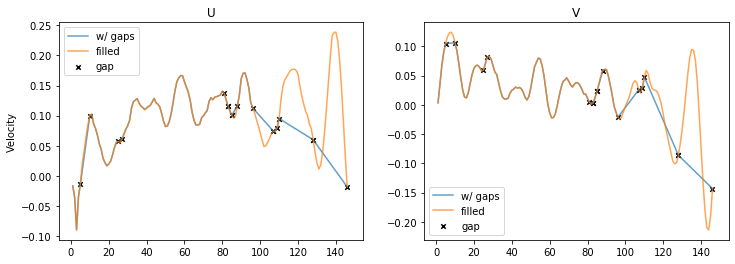

In [27]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(gTimes, U_gap, label='w/ gaps', alpha=0.7)              # w/ gap
ax1.plot(fTimes, U_fil, label= 'filled', alpha=0.7)              # filled
#ax1.plot(fTimes, U_t1, label='t1', alpha=0.7)                    # t1 data
ax1.scatter(gaps, Uy, marker='x', color='k', label='gap', s=20)  # points
#ax1.set_xlim(80,90)
ax1.set_title('U')
ax1.set_ylabel('Velocity')
ax1.legend()

ax2 = fig.add_subplot(1,2,2)
ax2.plot(gTimes, V_gap, label='w/ gaps', alpha=0.7)              # w/ gap
ax2.plot(fTimes, V_fil, label= 'filled', alpha=0.7)              # filled
#ax2.plot(fTimes, V_t1, label='t1', alpha=0.7)                    # t1 data
ax2.scatter(gaps, Vy, marker='x', color='k', label='gap', s=20)  # points
#ax2.set_xlim(75,90)
ax2.set_title('V')
ax2.legend()

plt.show()

n = 371


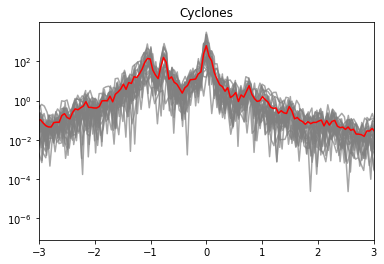

In [69]:
"""FFTs for Cyclonic Eddies"""
# find value to bin ffts
n_c = len(cyclones[0]['step'])
for eddy in cyclones:
    steps = len(eddy['step'])
    if steps > n_c:
        n_c = steps
print('n =', n_c)

fullTimes = np.arange(0, n_c, dt)
fq = np.fft.fftfreq(fullTimes.shape[-1],dt)   # frequencies corresponding to each FC (cycles/h)

cyclone_amp = []
cyclone_fq_norms = []
# interpolate and perform fft for cyclones
for eddy in cyclones:
    steps, lons, lats = fillCoords(eddy['step'], eddy['x1'], eddy['y1'])
    maxt = len(steps)  # num steps where this eddy is present
    
    fCor = 2.*omega*np.sin((lats[len(lats)//2])/180*np.pi)  # coriolis frequency (rad/sec)

    # Tapered cosine window
    alpha = 0.2
    win = signal.tukey(maxt, alpha)  # 20% of points
    
    hvels = []
    for i, time in enumerate(steps):
        # interpolate U and V at each eddy center
        target_lon = lons[i]  # longitude of eddy center
        target_lat = lats[i]  # latitude of eddy center
        
        i_T = int(time-1)                                # index of time
        lb_lon = int((target_lon - lowest_lon)/nav_res)  # index of lon lower bound
        lb_lat = int((target_lat - lowest_lat)/nav_res)  # index of lat lower bound

        W2lon = (target_lon - lowest_lon)%nav_res  # W2 lon
        W2lat = (target_lat - lowest_lat)%nav_res  # W2 lat

        Us = gridU_k1.variables['vozocrtx'][i_T, 0, lb_lat:lb_lat+2, lb_lon:lb_lon+2].copy()  # zonal velocities grid
        Vs = gridV_k1.variables['vomecrty'][i_T, 0, lb_lat:lb_lat+2, lb_lon:lb_lon+2].copy()  # meridional velocities grid

        # interpolate for U and V (based on unit square)
        U_target = Us[0,0]*(1-W2lon)*(1-W2lat) + Us[0,1]*W2lon*(1-W2lat) + Us[1,0]*(1-W2lon)*W2lat + Us[1,1]*W2lon*W2lat
        V_target = Vs[0,0]*(1-W2lon)*(1-W2lat) + Vs[0,1]*W2lon*(1-W2lat) + Vs[1,0]*(1-W2lon)*W2lat + Vs[1,1]*W2lon*W2lat

        hvels.append(U_target + 1j*V_target)

    fcs = np.fft.fft(hvels*win, n=n_c)  # k1 Fourier coefficients (FCs) w/ window and padded to n
    plotAmps = np.abs(fcs)**2
    plotFreq = fq*2*np.pi/fCor/3600
    if eddy is cyclones[0]:
        cyclone_amps = plotAmps      # preallocate array for amplitudes
        cyclone_fq_norms = plotFreq  # preallocate array for normalized frequencies
    else:
        cyclone_amps += plotAmps      # add to amplitudes
        cyclone_fq_norms += plotFreq  # add to normalized frequencies
    plt.plot(np.fft.fftshift(plotFreq), np.fft.fftshift(plotAmps), color='gray', alpha=0.7)

nCyclones = len(cyclones)      # number of cyclones
cyclone_amps /= nCyclones      # average amplitudes
cyclone_fq_norms /= nCyclones  # average frquencies

# rearrange data for plotting
cyclone_amps = np.fft.fftshift(cyclone_amps)
cyclone_fq_norms = np.fft.fftshift(cyclone_fq_norms)

plt.plot(cyclone_fq_norms, cyclone_amps, color='r')
plt.yscale('log')
plt.xlim(-3,3)
plt.title('Cyclones')
plt.show()

n = 371


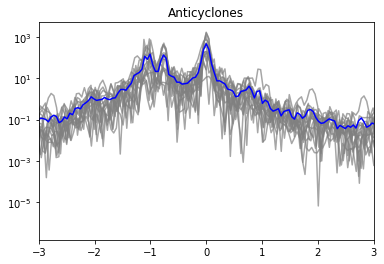

In [71]:
"""FFTs for Anticyclonic Eddies"""
# find value to bin ffts
n_a = len(anticyclones[0]['step'])
for eddy in anticyclones:
    steps = len(eddy['step'])
    if steps > n_a:
        n_a = steps
print('n =', n_a)

fullTimes = np.arange(1, n_a+1, dt)
fq = np.fft.fftfreq(fullTimes.shape[-1],dt)  # frequencies corresponding to each FC (cycles/h)

anticyclone_amp = []
anticyclone_fq_norms = []
# interpolate and perform fft for anticyclones
for eddy in anticyclones:
    steps, lons, lats = fillCoords(eddy['step'], eddy['x1'], eddy['y1'])
    maxt = len(steps)  # num steps where this eddy is present

    fCor = 2.*omega*np.sin((lats[len(lats)//2])/180*np.pi)  # coriolis frequency (rad/sec)

    # Tapered cosine window
    alpha = 0.2
    win = signal.tukey(maxt, alpha)  # 20% of points
    
    hvels = []
    for i, time in enumerate(steps):
        # interpolate U and V at each eddy center
        target_lon = lons[i]  # longitude of eddy center
        target_lat = lats[i]  # latitude of eddy center
        
        i_T = int(time-1)                                # index of time
        lb_lon = int((target_lon - lowest_lon)/nav_res)  # index of lon lower bound
        lb_lat = int((target_lat - lowest_lat)/nav_res)  # index of lat lower bound

        W2lon = (target_lon - lowest_lon)%nav_res  # W2 lon
        W2lat = (target_lat - lowest_lat)%nav_res  # W2 lat

        Us = gridU_k1.variables['vozocrtx'][i_T, 0, lb_lat:lb_lat+2, lb_lon:lb_lon+2].copy()  # zonal velocities grid
        Vs = gridV_k1.variables['vomecrty'][i_T, 0, lb_lat:lb_lat+2, lb_lon:lb_lon+2].copy()  # meridional velocities grid

        # interpolate for U and V (based on unit square)
        U_target = Us[0,0]*(1-W2lon)*(1-W2lat) + Us[0,1]*W2lon*(1-W2lat) + Us[1,0]*(1-W2lon)*W2lat + Us[1,1]*W2lon*W2lat
        V_target = Vs[0,0]*(1-W2lon)*(1-W2lat) + Vs[0,1]*W2lon*(1-W2lat) + Vs[1,0]*(1-W2lon)*W2lat + Vs[1,1]*W2lon*W2lat

        hvels.append(U_target + 1j*V_target)

    fcs = np.fft.fft(hvels*win, n=n_a)  # k1 Fourier coefficients (FCs) w/ window and binned by n
    plotAmps = np.abs(fcs)**2
    plotFreq = fq*2*np.pi/fCor/3600
    if eddy is anticyclones[0]:
        anticyclone_amps = plotAmps      # preallocate array for amplitudes
        anticyclone_fq_norms = plotFreq  # preallocate array for normalized frequencies
    else:
        anticyclone_amps += plotAmps      # add to amplitudes
        anticyclone_fq_norms += plotFreq  # add to normalized frequencies
    plt.plot(np.fft.fftshift(plotFreq), np.fft.fftshift(plotAmps), color='gray', alpha=0.7)

nAnticyclones = len(anticyclones)      # number of anticyclones
anticyclone_amps /= nAnticyclones      # average amplitudes
anticyclone_fq_norms /= nAnticyclones  # average frquencies

# rearrange data for plotting
anticyclone_amps = np.fft.fftshift(anticyclone_amps)
anticyclone_fq_norms = np.fft.fftshift(anticyclone_fq_norms)

plt.plot(anticyclone_fq_norms, anticyclone_amps, color='b', label='interpolated')
plt.title('Anticyclones')
plt.yscale('log')
plt.xlim(-3,3)
plt.show()

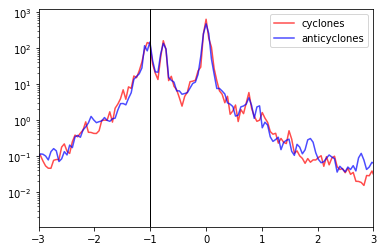

In [54]:
# compare time series of interpolated data to data at last position
plt.figure()
plt.plot(cyclone_fq_norms, cyclone_amps, label='cyclones', color='r', alpha=0.7)
plt.plot(anticyclone_fq_norms, anticyclone_amps, label='anticyclones', color='b', alpha=0.7)
plt.axvline(x=-1, color='k', linewidth=1)
plt.xlim(-3, 3)
plt.yscale('log')
plt.legend()
plt.show()

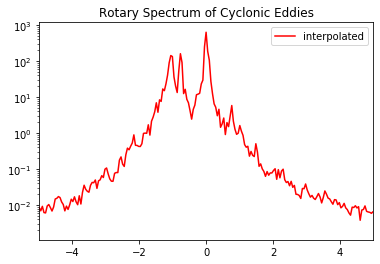

In [66]:
# rearrange data for plotting
plt.plot(cyclone_fq_norms, cyclone_amps, label='interpolated', color='r')
plt.yscale('log')
plt.xlim(-5,5)
plt.legend()
plt.title('Rotary Spectrum of Cyclonic Eddies')
plt.show()

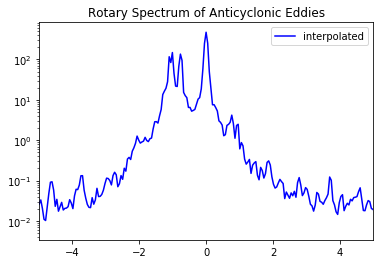

In [65]:
plt.plot(anticyclone_fq_norms, anticyclone_amps, label='interpolated', color='b')
plt.yscale('log')
plt.xlim(-5,5)
plt.legend()
plt.title('Rotary Spectrum of Anticyclonic Eddies')
plt.show()